In [68]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
from urllib.parse import urljoin
from tqdm import tqdm_notebook
import pandas as pd
import urllib
import matplotlib.pyplot as plt
%matplotlib inline
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system. sorry~~~')
import seaborn as sns

In [3]:
date = pd.date_range('2019-12-1', periods=100, freq='D')

In [4]:
movie_date =[]
movie_name = []
movie_point = []

for today in tqdm_notebook(date):
    html = "https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date={date}"
    response = urlopen(html.format(date = 
                                  urllib.parse.quote(today.strftime('%Y%m%d'))))
    soup = BeautifulSoup(response, "lxml")
    
    end = len(soup.find_all('td', 'point'))
    
    movie_date.extend([today for n in range(0,end)])
    movie_name.extend([soup.find_all('div', 'tit5')[n].a.string for n in range(0,end)])
    movie_point.extend([float(soup.find_all('td', 'point')[n].string) for n in range(0,end)])
    
movie_data_all = pd.DataFrame({'date':movie_date,'name':movie_name, 'point':movie_point})

# 1. 2019년 12월~ 100일간 평균 평점이 가장 높은 영화 1~5위 영화는?

In [83]:
top_5_movie_group = pd.DataFrame(movie_data_all.groupby('name').point.mean(), columns=['point'])
top_5_movie_group = movie_group.sort_values('point', ascending=False).head(5)
i=0
for n in top_5_movie_group.index:
    print("평균 평점 %d위 영화 : %s, 평점 : %.2f"%(i+1, str(n), float(top_5_movie_group['point'][n])))
    

평균 평점 1위 영화 : 그린 북, 평점 : 9.61
평균 평점 1위 영화 : 가버나움, 평점 : 9.59
평균 평점 1위 영화 : 포드 V 페라리, 평점 : 9.54
평균 평점 1위 영화 : 주전장, 평점 : 9.51
평균 평점 1위 영화 : 원더, 평점 : 9.49


# 2. 날짜 별 평점의 변화를 그래프로 그려 보세요.
## 기간내에 평점횟수가 가장 많은 5개의 영화 에대한 평점 분포 그래프

In [69]:
movie_pivot = pd.pivot_table(movie_data_all, index=["date"], columns=['name'], values=['point'])
movie_pivot.columns = movie_pivot.columns.droplevel()

In [70]:
a = pd.DataFrame(movie_data_all.groupby('name').count())
top5 = list(a.sort_values('point', ascending=False).head(5).index)

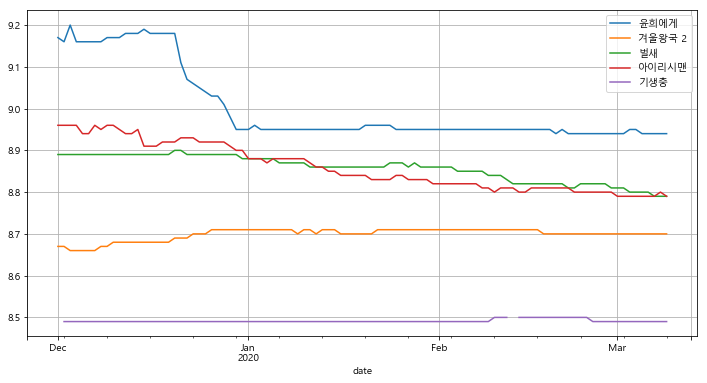

In [71]:
movie_pivot.plot(y = top5, figsize=(12,6))
plt.legend(loc='best')
plt.grid()
plt.show()